In [1]:
#https://www.youtube.com/watch?v=SEQbb8w7VTw&t=877s&ab_channel=ComputerScience
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data as web
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#from google.colab import files
#uploades = files.upload()
#AAPL = pd.read_csv('AAPL.csv')

stock = 'TSLA'
def market_signal(stock):
  start_date = (datetime.datetime.now() - datetime.timedelta(days=120)).strftime("%m-%d-%Y")
  df = web.DataReader(stock, data_source='yahoo', start=start_date)
  return df
df = market_signal(stock)



In [3]:
stock = 'XOM'
def market_signal2(stock):
  start_date = (datetime.datetime.now() - datetime.timedelta(days=120)).strftime("%m-%d-%Y")
  div = web.DataReader(stock, data_source='yahoo-actions')
  df = web.DataReader(stock, data_source='yahoo', start=start_date)
  perc = div["value"][-1]/df["Close"][-1]*100
  return perc
df = market_signal(stock)

print(df)

                 High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2020-10-05  33.750000  33.169998  33.320000  33.740002  22965200.0  32.945152
2020-10-06  34.419998  33.310001  34.119999  33.389999  26731800.0  32.603394
2020-10-07  33.740002  33.209999  33.639999  33.500000  23779300.0  32.710804
2020-10-08  35.340000  33.759998  33.880001  35.259998  34413700.0  34.429340
2020-10-09  35.950001  34.650002  35.680000  34.740002  29228600.0  33.921593
...               ...        ...        ...        ...         ...        ...
2021-01-26  47.860001  45.849998  47.259998  45.869999  23976800.0  45.869999
2021-01-27  46.660000  44.529999  45.000000  45.349998  32410300.0  45.349998
2021-01-28  46.590000  45.689999  45.939999  46.060001  24967200.0  46.060001
2021-01-29  46.040001  44.509998  45.549999  44.840000  38950400.0  44.840000
2021-02-01  45.570000  44.290001  45.580002  44.907700  18146499

In [4]:
SMA30 = pd.DataFrame()
SMA30["Adj Close"] = df["Adj Close"].rolling(window = 5).mean()

SMA100 = pd.DataFrame()
SMA100["Adj Close"] = df["Adj Close"].rolling(window = 100).mean()

DEMA05 = pd.DataFrame()
DEMA05["Adj Close"] = df["Adj Close"].ewm(span=21).mean()

DEMA20 = pd.DataFrame()
DEMA20["Adj Close"] = df["Adj Close"].ewm(span=55).mean()

DEMA = pd.DataFrame()
DEMA["Adj Close"] = df["Adj Close"].rolling(window=20, min_periods=1, win_type='exponential').mean(tau=10)
 

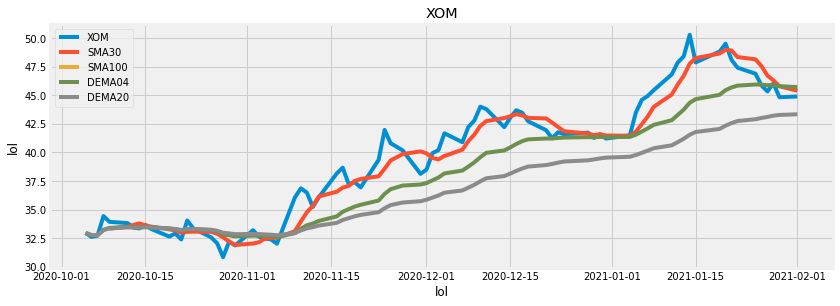

In [5]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(df["Adj Close"], label = stock)
plt.plot(SMA30["Adj Close"], label = "SMA30")
plt.plot(SMA100["Adj Close"], label = "SMA100")
plt.plot(DEMA05["Adj Close"], label = "DEMA04")
plt.plot(DEMA20["Adj Close"], label = "DEMA20")
plt.title(stock)
plt.xlabel("lol")
plt.ylabel("lol")
plt.legend(loc= "upper left")
plt.show()

In [6]:
data = pd.DataFrame()
data[stock] = df["Adj Close"]
data["SMA30"] = SMA30["Adj Close"]
data["SMA100"] = SMA100["Adj Close"]
data["DEMA05"] = DEMA05["Adj Close"]
data["DEMA20"] = DEMA20["Adj Close"]


In [7]:
def buy_sell(data, stock):
    sigPriceBuy = []
    sigPriceSell = []
    flag= -1

    for i in range(len(data)):
      if data["DEMA05"][i] > data["DEMA20"][i]:
        if flag != 1:
          sigPriceBuy.append(data[stock][i])
          sigPriceSell.append(np.nan)
          flag=1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif data["DEMA05"][i] < data["DEMA20"][i]:
        if flag != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data[stock][i])
          flag=0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)

    return (sigPriceBuy, sigPriceSell)





In [8]:
buy_sell1 = buy_sell(data, stock)
data["Buy"] = buy_sell1[0]
data["Sell"] = buy_sell1[1]

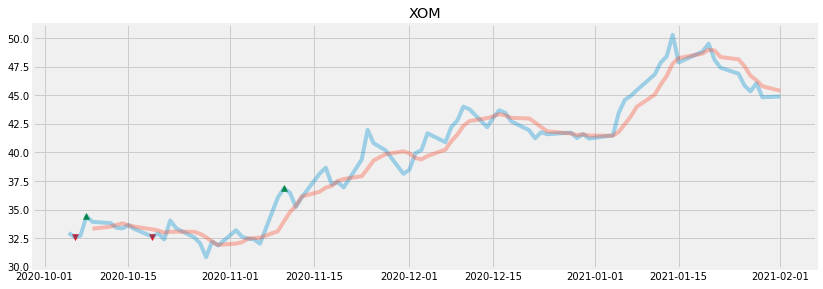

In [9]:
plt.figure(figsize=(12.5, 4.5))
plt.plot(data[stock], alpha =0.35)
plt.plot(data["SMA30"], alpha =0.35)
plt.plot(data["SMA100"], alpha =0.35)
plt.scatter(data.index, data["Buy"], label= "Buy", marker = "^", color = "green" )
plt.scatter(data.index, data["Sell"], label= "Sell", marker = "v", color = "red" )
plt.title(stock)
plt.show()

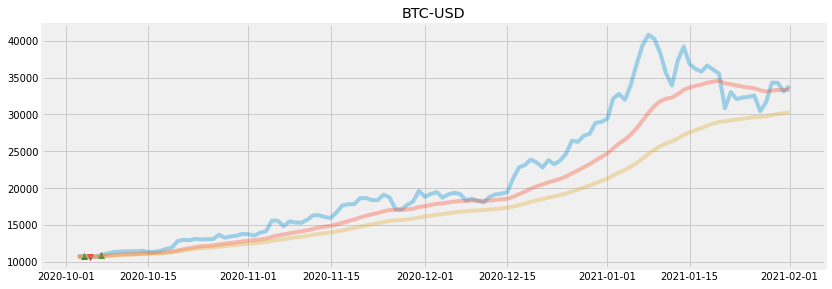

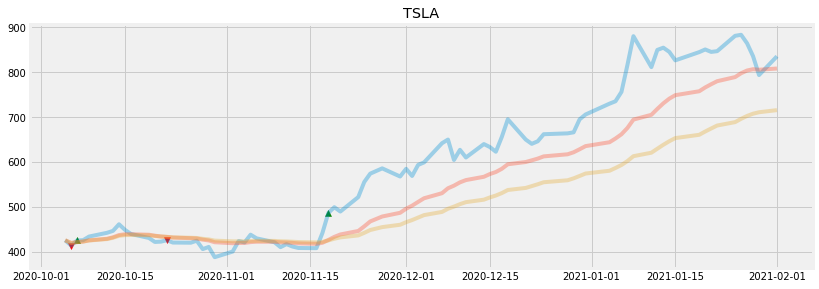

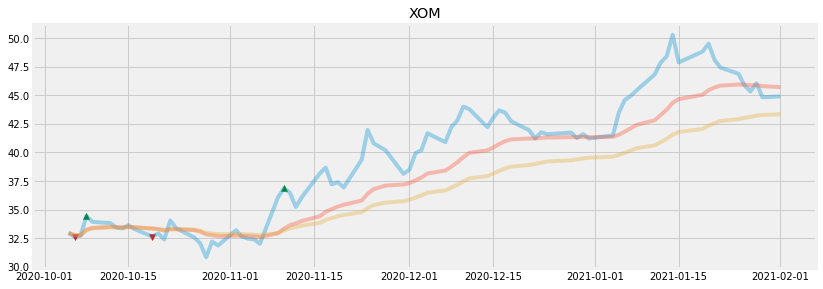

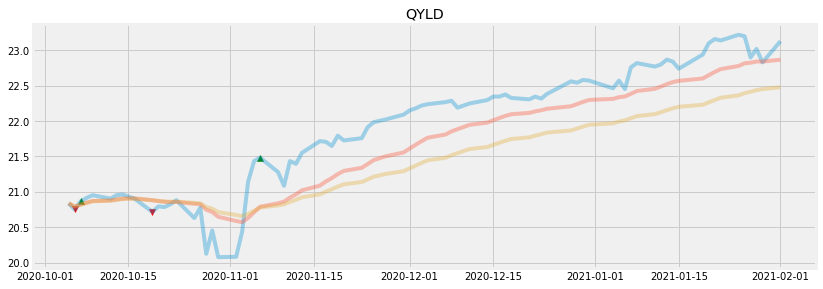

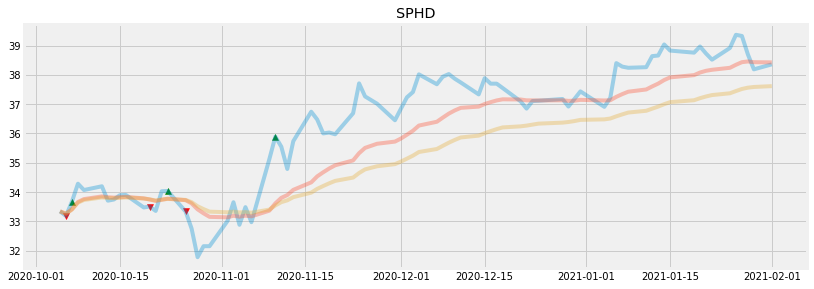

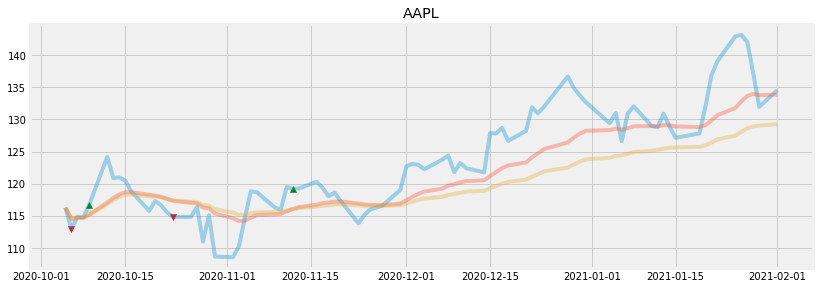

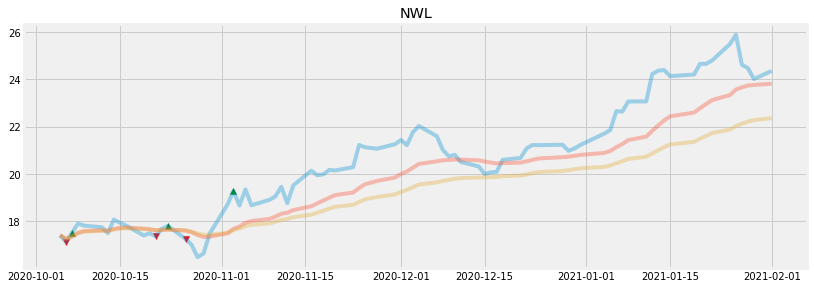

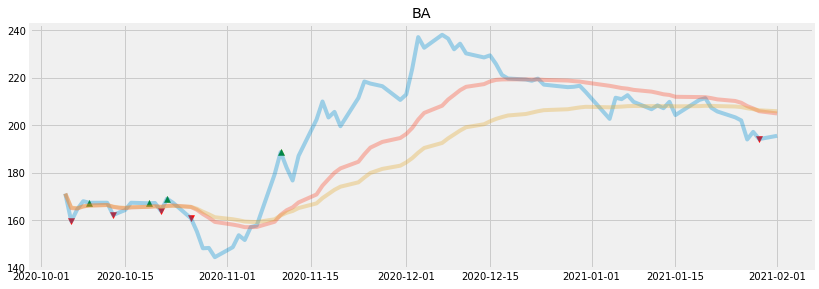

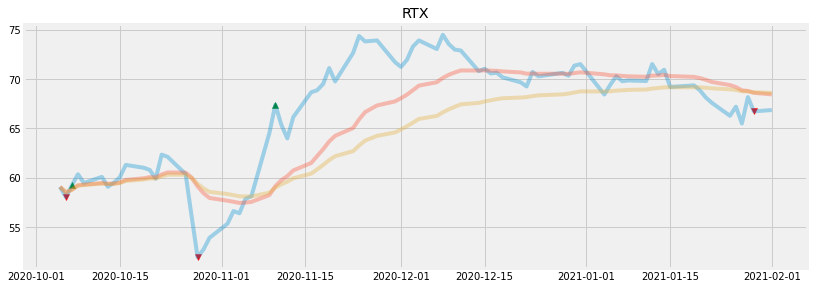

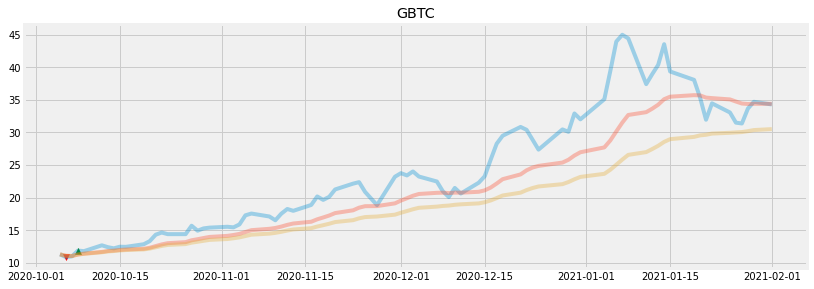

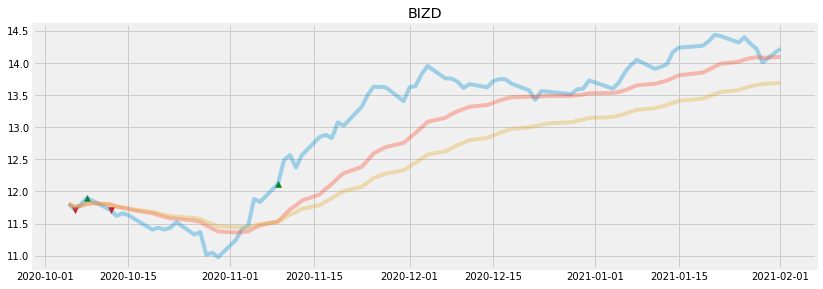

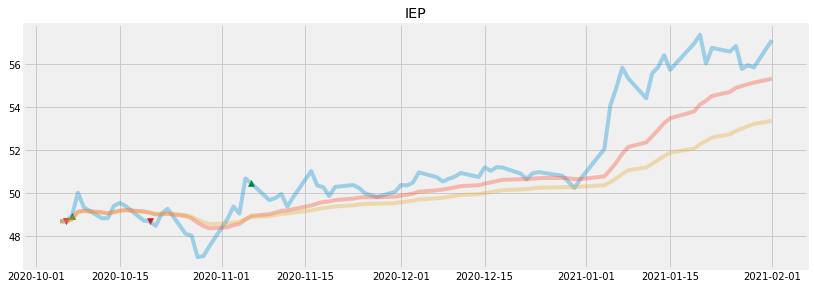

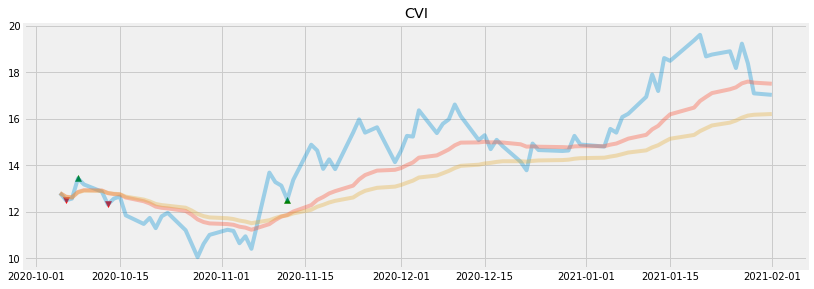

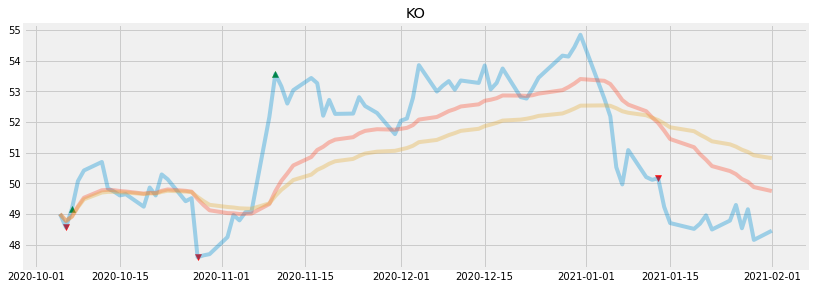

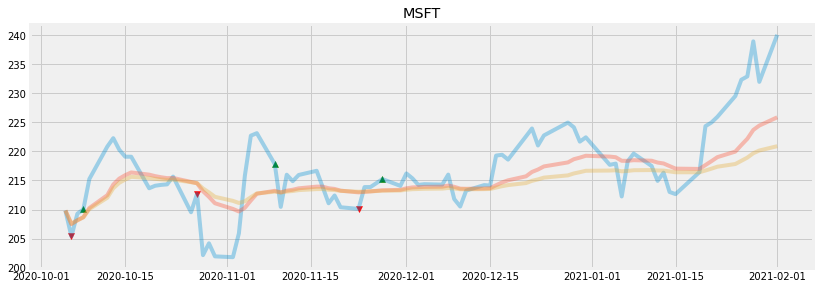

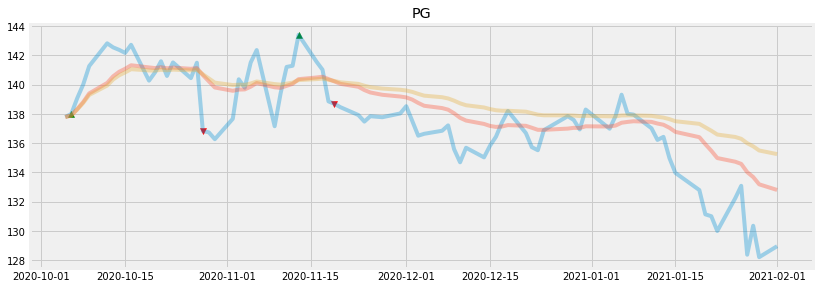

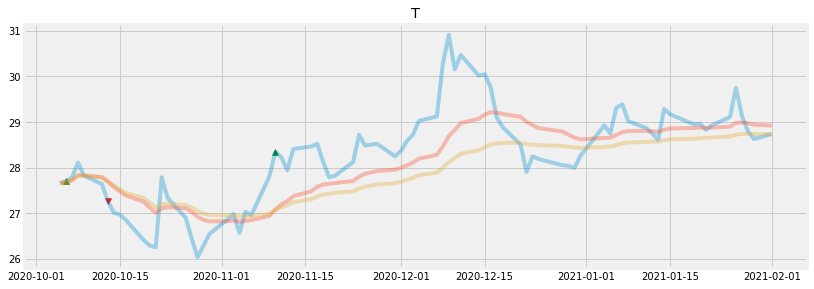

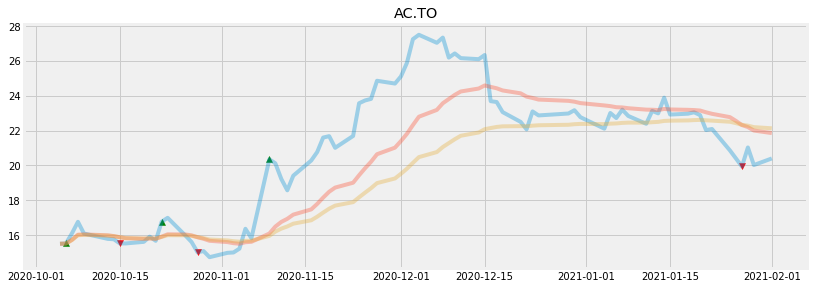

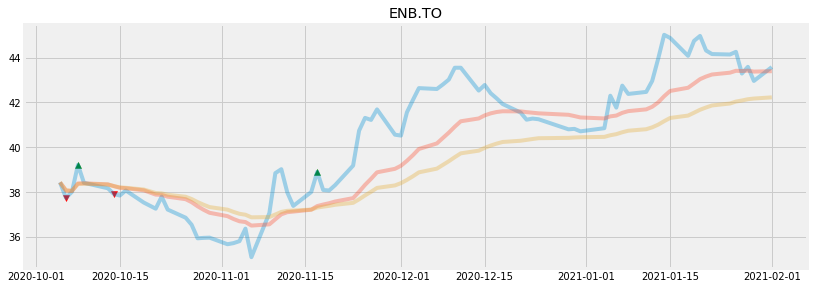

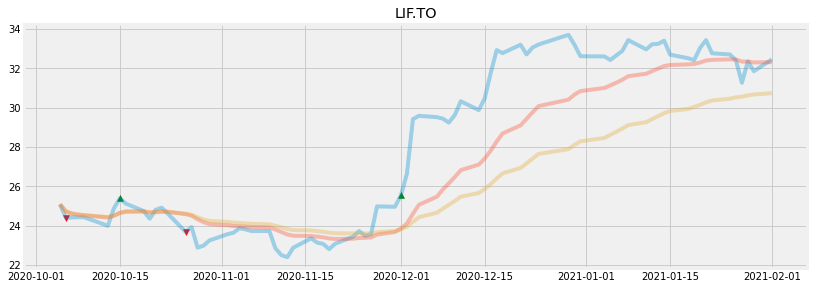

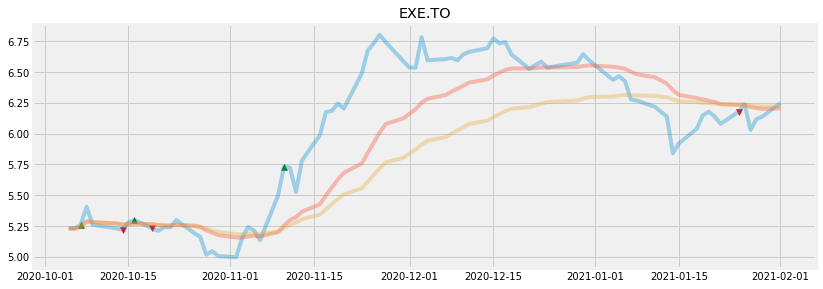

ConversionError: ignored

<Figure size 900x324 with 1 Axes>

In [10]:
stock = ["BTC-USD","TSLA", "XOM", "QYLD", "SPHD", "AAPL", "NWL", "BA", "RTX","GBTC", "BIZD", "IEP", "CVI", "KO", "MSFT", "PG", "T", "AC.TO", "ENB.TO","LIF.TO", "EXE.TO", "SIA.TO"]

for s in stock:
  df = market_signal(s)
  data = pd.DataFrame()
  data[s] = df["Adj Close"]
  DEMA05 = pd.DataFrame()
  DEMA05["Adj Close"] = df["Adj Close"].ewm(span=21).mean()
  #DEMA05["Adj Close"] = df["Adj Close"].ewm(span=5).mean().shift(-1)


  DEMA20 = pd.DataFrame()
  DEMA20["Adj Close"] = df["Adj Close"].ewm(span=55).mean()
  data["DEMA05"] = DEMA05["Adj Close"]
  data["DEMA20"] = DEMA20["Adj Close"]
  buy_sells =()
  buy_sells = buy_sell(data, s)
  data["Buy"] = buy_sells[0]
  data["Sell"] = buy_sells[1]
  plt.figure(figsize=(12.5, 4.5))
  plt.plot(data[s], alpha =0.35)
  plt.plot(data["DEMA05"], alpha =0.35)
  plt.plot(data["DEMA20"], alpha =0.35)
  plt.scatter(data.index, data["Buy"], label= "Buy", marker = "^", color = "green" )
  plt.scatter(data.index, data["Sell"], label= "Sell", marker = "v", color = "red" )
  plt.title(s)
  plt.show()

